# Experiment Tracking with MLFlow (Local)

In this demo we will see how to use MLFlow for tracking experiments, using a toy data set. In the attached lab (below), you will download a larger dataset and attempt to train the best model that you can.

We should first install mlflow, and add it to the requirements.txt file if not done already.

`pip install mlflow` or `python3 -m pip install mlflow`.

You may also need to `pip install setuptools`.

From here, make sure to save this notebook in a specific folder, and ensure you run all command line commands from the same folder.

In [13]:
import mlflow
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score


After loading the libraries, we can first check the mlflow version you have. And, just for fun, let's look at the mlflow UI by running `mlflow ui`. After this, we should do two things:
- set the tracking uri
- create or set the experiment

Setting the tracking uri tells mlflow where to save the results of our experiments. We will first save these locally in a sqlite instance. In a future lab we will set up mlflow to run in GCP.

If you've already created an experiment previously that you'd like to use, you can tell mlflow by setting the experiment. You can also use `set_experiment` even if the experiment has not yet been created - mlflow will first check if the experiment exists, and if not, it will create it for you. 

Running the below code will create a sqlite database and an mlruns folder in the current directory.

In [25]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('demo-experiment')

<Experiment: artifact_location='/Users/catalinabartholomew/Documents/msdsMac/springMod2/specialTopicsInAI/labs/mlruns/1', creation_time=1742502801480, experiment_id='1', last_update_time=1742502801480, lifecycle_stage='active', name='demo-experiment', tags={}>

From here, we can load the wine data from sklearn and take a look at it. Then let's play around with some models, without using mlflow for now, to get a sense of why mlflow might come in handy.

In [26]:
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [27]:
y = wine.target
X = df_wine
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=4)

In [28]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [29]:
accuracy_score(y, dt.predict(df_wine))

0.9887640449438202

## Train a Model Using MLFLow

In this section, let's train a simple decision tree model, where we will now adjust the maximum depth (`max_depth`) of the tree, and save the results of each run of the experiment using mlflow. To do so, we need to tell mlflow to start recording. We do this with `start_run`. 

The things we might want to record in this simple case are:
- the value of `max_depth`
- the corresponding accuracy of the model

We can also tag each run to make it easier to identify them later.

After running the below code, be sure to check the mlflow UI by running the following in the terminal from the same directory as where you saved this notebook:

`mlflow ui` note that just running this you will not see any of your experiments. You must specify the uri (the place where all of your results are being stored)

`mlflow ui --backend-store-uri sqlite:///mlflow.db`

After loading the libraries, we can first check the mlflow version you have. And, just for fun, let's look at the mlflow UI by running `mlflow ui`. After this, we should do two things:
- set the tracking uri
- create or set the experiment

Setting the tracking uri tells mlflow where to save the results of our experiments. We will first save these locally in a sqlite instance. In a future lab we will set up mlflow to run in GCP.

If you've already created an experiment previously that you'd like to use, you can tell mlflow by setting the experiment. You can also use `set_experiment` even if the experiment has not yet been created - mlflow will first check if the experiment exists, and if not, it will create it for you. 

In [36]:
with mlflow.start_run():
    # log parameters and log metrics
    # parameters: hyperparameters
    # metrics: model performance metrics

    mlflow.set_tags({"Model":"decision-tree", "Train Data": "all-data"})

    tree_depth = 5
    dt = DecisionTreeClassifier(max_depth=tree_depth)
    dt.fit(X, y)
    acc = accuracy_score(y, dt.predict(df_wine))

    mlflow.log_param("max_depth", tree_depth)
    mlflow.log_metric("accuracy", acc)

mlflow.end_run()

Let's do it again, but this time we'll use a random forest, which has some other hyperparameters we can tune, which makes keeping track of things a little more complex without a tool like mlflow.

In [37]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run():
    mlflow.set_tags({"Model":"random-forest", "Train Data": "all-data"})

    ntree = 1000
    mtry = 4

    mlflow.log_params({'n_estimators':ntree, 'max_features':mtry})

    rf = RandomForestClassifier(n_estimators = ntree, max_features = mtry, oob_score = True)
    rf.fit(X,y)
    acc = rf.oob_score_
    #acc = accuracy_score(y, rf.predict(X))
    mlflow.log_metric('accuracy', acc)

mlflow.end_run()

Typically, in a real-world scenario, you wouldn't change your parameter values manually and re-run your code, you would either use a loop to loop through different parameter values, or you'd use a built-in method for doing cross-validation, of which there are a few. First, let's use a simple loop to run the experiment multiple times, and save the results of each run.

In [38]:
ntrees = [20,40,60,80,100]
mtrys = [3,4,5]
for i in ntrees:
    for j in mtrys:
        with mlflow.start_run():
            mlflow.set_tags({"Model":"random-forest", "Train Data": "all-data"})

            mlflow.log_params({'n_estimators':i, 'max_features':j})

            rf = RandomForestClassifier(n_estimators = i, max_features = j, oob_score = True)
            rf.fit(X,y)
            acc = rf.oob_score_
            #acc = accuracy_score(y, rf.predict(X))
            mlflow.log_metric('accuracy', acc)
        mlflow.end_run()

## Training a Model with mlflow and hyperopt

One way of tuning your model is to use the `hyperopt` library. `hyperopt` is a library that does hyperparameter tuning, and does so in a way that makes it easy for mlflow to keep track of the results. 

First, install the libraries you don't have, and then load them below. We do not use `hyperopt` much in the class, so if you don't want to add it to your requirements.txt file, you don't have to.

For this exercise, we'll split the data into training and validation, and then we'll train decision trees and random forests and use `hyperopt` to do the hyperparameter tuning and find the best model for us.

In [42]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

From the above we will use `cross_val_score` for our metric, `fmin` is used by `hyperopt` to do the tuning, `tpe` (Tree of Parzen Estimators) is the algorithm used to search the hyperparameter space,  `hp` has methods we need to use for defining our search space, `STATUS_OK` is a status message that each run completed, and `Trials` keeps track of each run.

In [40]:
def objective(params):
    with mlflow.start_run():
        classifier_type = params['type']
        del params['type']
        if classifier_type == 'dt':
            clf = DecisionTreeClassifier(**params)
        elif classifier_type == 'rf':
            clf = RandomForestClassifier(**params)        
        else:
            return 0
        acc = cross_val_score(clf, X, y).mean()

        mlflow.set_tag("Model", classifier_type)
        mlflow.log_params(params)
        mlflow.log_metric("accuracy", acc)
        mlflow.end_run()
        return {'loss': -acc, 'status': STATUS_OK}

search_space = hp.choice('classifier_type', [
    {
        'type': 'dt',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth', [None, hp.randint('dtree_max_depth_int', 1,10)]),
        'min_samples_split': hp.randint('dtree_min_samples_split', 2,10)
    },
    {
        'type': 'rf',
        'n_estimators': hp.randint('rf_n_estimators', 20, 500),
        'max_features': hp.randint('rf_max_features', 2,9),
        'criterion': hp.choice('criterion', ['gini', 'entropy'])
    },
])

algo = tpe.suggest
trials = Trials()

In [41]:
best_result = fmin(
        fn=objective, 
        space=search_space,
        algo=algo,
        max_evals=32,
        trials=trials)

  0%|          | 0/32 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 32/32 [00:53<00:00,  1.69s/trial, best loss: -0.9888888888888889]


In [34]:
best_result

{'classifier_type': np.int64(1),
 'criterion': np.int64(1),
 'rf_max_features': np.int64(2),
 'rf_n_estimators': np.int64(39)}

### Using Autologging

Rather than manually logging parameters and metrics, mlflow has an autolog feature, which is compatible with a subset of python libraries, such as sklearn. Autologging makes it easy to log all of the important stuff, without having to manually write lines of code to log the parameters. However, sometimes you will want to have finer control over what gets logged, and should instead skip autologging.

In [35]:

with mlflow.start_run():
    mlflow.sklearn.autolog()
    tree_depth = 5
    dt = DecisionTreeClassifier(max_depth=tree_depth)
    dt.fit(X_train, y_train)
    mlflow.sklearn.autolog(disable=True)
mlflow.end_run()

# Artifact Tracking and Model Registry (Local)

In this section we will save some artifacts from our model as we go through the model development process. There are a few things that might be worth saving, such as datasets, plots, and the final model itself that might go into production later.

## Data

First, let's see how we can store our important datasets, in a compressed format, for use for later, for example, in case we get a new request about our model and need to run some analyses (such as "what is the distribution of this feature, but only for this specific subset of data?" or "how did the model do on these particular observations from your validation set?").

In [47]:
# X_train.isnull().sum()
# X_train['alcohol'] = X_train['alcohol'].astype('float64')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 33 to 44
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
dtypes: float64

In [50]:
import os 

os.makedirs('save_data', exist_ok = True)

# X_train.to_parquet('save_data/x_train.parquet')
# X_train.to_parquet('save_data/x_train.parquet', engine='pyarrow')
X_train.to_parquet('save_data/x_train.parquet', engine='fastparquet')


mlflow.log_artifact('save_data/x_train.parquet')

In [52]:
# X_test.to_parquet('save_data/x_test.parquet')
X_test.to_parquet('save_data/x_test.parquet', engine='fastparquet')

mlflow.log_artifacts('save_data/')

You can now go to the mlflow UI, click on the latest run, and select the Artifacts tab. You should see something similar to this:
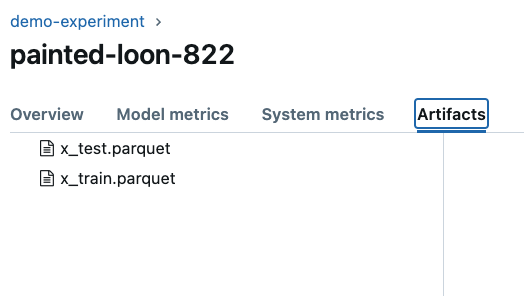

## Images

As part of the model dev process you may end up creating visualizations that can be useful for analysis, or for reporting. You can use mlflow to log the important ones and ignore the rest. After creating the below figure, save into a folder called images, and then you can log whatever is in the `images` folder as an artifact.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

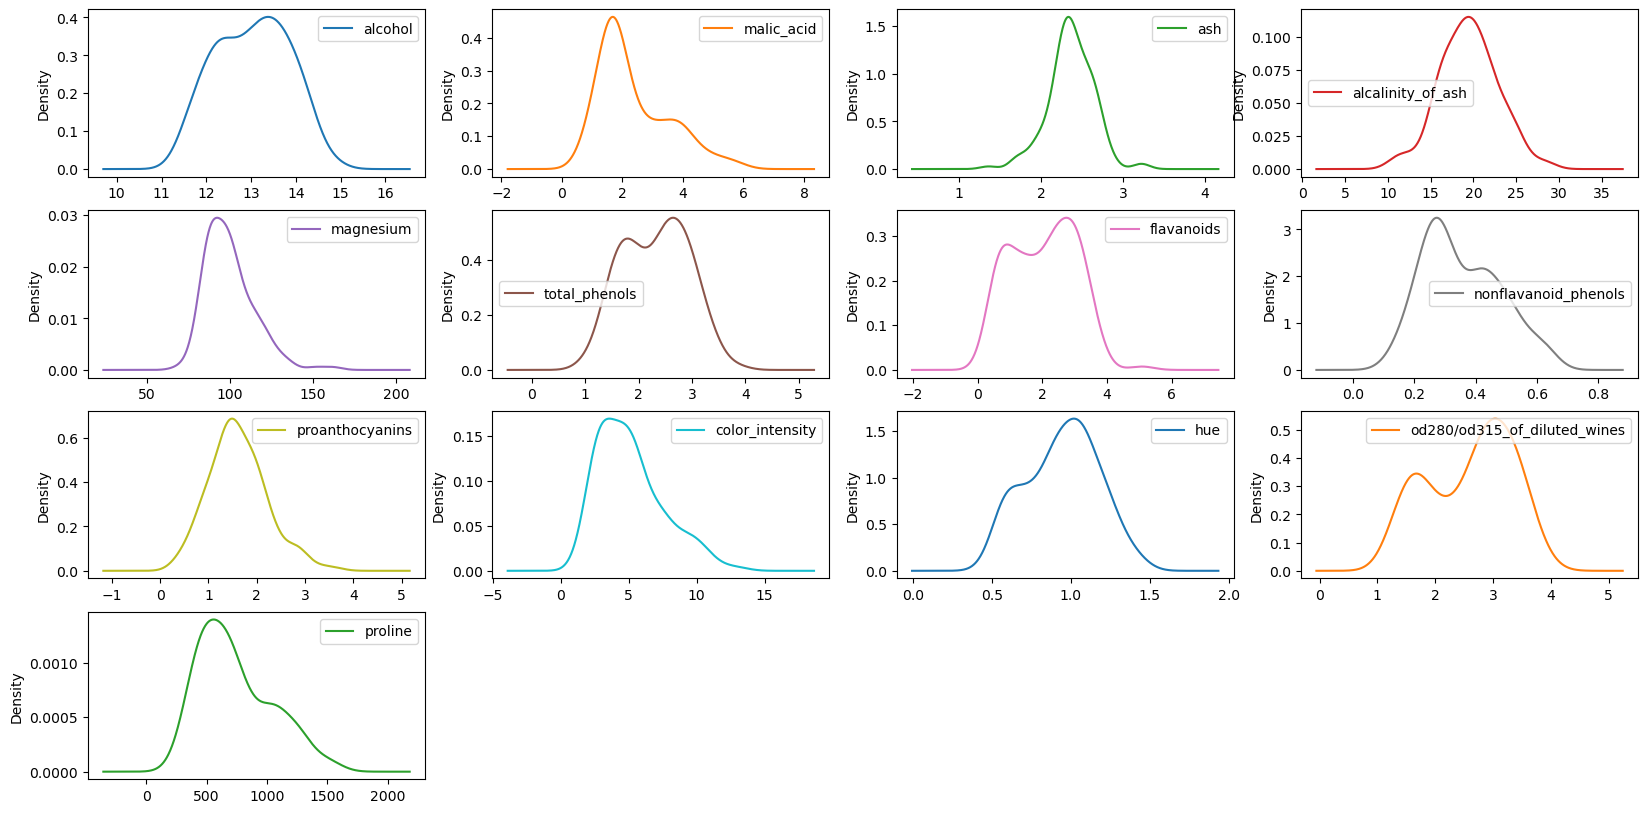

In [53]:
%matplotlib inline
os.makedirs('images', exist_ok = True)
X_train.plot.density(subplots = True, figsize = (20,10), layout = (4,4), sharey = False, sharex = False)

In [54]:
mlflow.log_artifacts('images')
mlflow.end_run()

Notice how all of the artifacts were saved in the same run of the experiment. We could have added an `mlflow.end_run()` in between our `log_artifacts` lines to separate runs if we wanted to.

## Model Management and Model Registry

As you are developing your models you may want to save certain versions of the model, or maybe even all of them, so that you don't have to go back and retrain them later. We can do this in mlflow by logging the models, not as artifacts, but as models, using `log_model`. 

In this section we'll log a couple of models to see how mlflow handles model management. Above, we used `hyperopt` to train a bunch of models at once. Let's do this again, and log some of the models that we train.

### Logging as an Artifact

First we can try logging a model as an artifact. To do this, we must first save the model itself, which we can do by using the `pickle` library. We then log the model as an artifact like we did with data and images. 

In [55]:
import pickle

os.makedirs('../models', exist_ok = True)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

with open('../models/model.pkl','wb') as f:
    pickle.dump(dt,f)

# First we'll log the model as an artifact
mlflow.log_artifact('../models/model.pkl', artifact_path='my_models')

### Logging as a Model

Logging the model as an artifact only logs the pickle file (the serialized version of the model). It's not really very useful, especially since models contain so much metadata that might be critical to know for deploying the model later. mlflow has a built-in way of logging models specifically, so let's see how to use this, and how it's different from logging models as an artifact.

In [56]:
# Let's do it again, but this time we will log the model using log_model
mlflow.sklearn.log_model(dt, artifact_path = 'better_models')
mlflow.end_run()

2025/03/20 14:28:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Ok, so if you go to the mlflow UI at this point you can see the difference in `log_artifact`, which simply logs the pickle file, and `log_model`, which also gives you information about the environment, required packages, and model flavor.

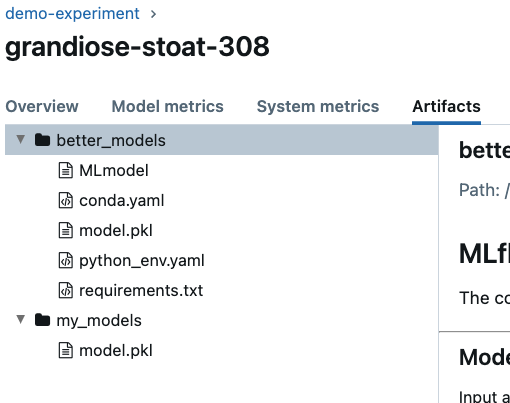

Let's do this one more time, but this time let's use `hyperopt` and log all of the trained models separately. Let's do this in a new experiment called 'demo-experiment2'. 

In [57]:
mlflow.set_experiment('demo-experiment2')
def objective(params):
    with mlflow.start_run():
        classifier_type = params['type']
        del params['type']
        if classifier_type == 'dt':
            clf = DecisionTreeClassifier(**params)
        elif classifier_type == 'rf':
            clf = RandomForestClassifier(**params)        
        else:
            return 0
        acc = cross_val_score(clf, X, y).mean()

        mlflow.set_tag("Model", classifier_type)
        mlflow.log_params(params)
        mlflow.log_metric("accuracy", acc)
        mlflow.sklearn.log_model(clf, artifact_path = 'better_models')
        mlflow.end_run()
        return {'loss': -acc, 'status': STATUS_OK}
search_space = hp.choice('classifier_type', [
    {
        'type': 'dt',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth', [None, hp.randint('dtree_max_depth_int', 1,10)]),
        'min_samples_split': hp.randint('dtree_min_samples_split', 2,10)
    },
    {
        'type': 'rf',
        'n_estimators': hp.randint('rf_n_estimators', 20, 500),
        'max_features': hp.randint('rf_max_features', 2,9),
        'criterion': hp.choice('criterion', ['gini', 'entropy'])
    },
])

algo = tpe.suggest
trials = Trials()
best_result = fmin(
        fn=objective, 
        space=search_space,
        algo=algo,
        max_evals=32,
        trials=trials)

2025/03/20 14:29:50 INFO mlflow.tracking.fluent: Experiment with name 'demo-experiment2' does not exist. Creating a new experiment.


  0%|          | 0/32 [00:00<?, ?trial/s, best loss=?]

2025/03/20 14:30:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



  3%|▎         | 1/32 [00:11<05:58, 11.56s/trial, best loss: -0.9720634920634922]

2025/03/20 14:30:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



  6%|▋         | 2/32 [00:17<04:10,  8.36s/trial, best loss: -0.9720634920634922]

2025/03/20 14:30:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



  9%|▉         | 3/32 [00:26<04:07,  8.52s/trial, best loss: -0.9720634920634922]

2025/03/20 14:30:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 12%|█▎        | 4/32 [00:32<03:26,  7.39s/trial, best loss: -0.9720634920634922]

2025/03/20 14:30:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 16%|█▌        | 5/32 [00:37<03:01,  6.72s/trial, best loss: -0.9720634920634922]

2025/03/20 14:30:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 19%|█▉        | 6/32 [00:43<02:45,  6.36s/trial, best loss: -0.9720634920634922]

2025/03/20 14:30:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 22%|██▏       | 7/32 [00:48<02:32,  6.12s/trial, best loss: -0.9720634920634922]

2025/03/20 14:30:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 25%|██▌       | 8/32 [00:55<02:30,  6.29s/trial, best loss: -0.9720634920634922]

2025/03/20 14:30:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 28%|██▊       | 9/32 [01:01<02:20,  6.09s/trial, best loss: -0.9720634920634922]

2025/03/20 14:30:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 31%|███▏      | 10/32 [01:06<02:12,  6.01s/trial, best loss: -0.9720634920634922]

2025/03/20 14:31:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 34%|███▍      | 11/32 [01:15<02:19,  6.64s/trial, best loss: -0.9720634920634922]

2025/03/20 14:31:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 38%|███▊      | 12/32 [01:20<02:05,  6.30s/trial, best loss: -0.9720634920634922]

2025/03/20 14:31:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 41%|████      | 13/32 [01:28<02:09,  6.84s/trial, best loss: -0.9720634920634922]

2025/03/20 14:31:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 44%|████▍     | 14/32 [01:35<02:04,  6.90s/trial, best loss: -0.9720634920634922]

2025/03/20 14:31:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 47%|████▋     | 15/32 [01:44<02:04,  7.35s/trial, best loss: -0.9833333333333332]

2025/03/20 14:31:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 50%|█████     | 16/32 [01:50<01:54,  7.17s/trial, best loss: -0.9833333333333332]

2025/03/20 14:31:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 53%|█████▎    | 17/32 [01:56<01:40,  6.69s/trial, best loss: -0.9833333333333332]

2025/03/20 14:31:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 56%|█████▋    | 18/32 [02:03<01:36,  6.87s/trial, best loss: -0.9833333333333332]

2025/03/20 14:32:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 59%|█████▉    | 19/32 [02:10<01:29,  6.88s/trial, best loss: -0.9833333333333332]

2025/03/20 14:32:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 62%|██████▎   | 20/32 [02:16<01:17,  6.49s/trial, best loss: -0.9833333333333332]

2025/03/20 14:32:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 66%|██████▌   | 21/32 [02:25<01:19,  7.21s/trial, best loss: -0.9833333333333332]

2025/03/20 14:32:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 69%|██████▉   | 22/32 [02:36<01:25,  8.53s/trial, best loss: -0.9833333333333332]

2025/03/20 14:32:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 72%|███████▏  | 23/32 [02:45<01:17,  8.62s/trial, best loss: -0.9833333333333332]

2025/03/20 14:32:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 75%|███████▌  | 24/32 [02:52<01:03,  7.99s/trial, best loss: -0.9833333333333332]

2025/03/20 14:32:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 78%|███████▊  | 25/32 [03:00<00:57,  8.23s/trial, best loss: -0.9833333333333332]

2025/03/20 14:32:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 81%|████████▏ | 26/32 [03:07<00:46,  7.81s/trial, best loss: -0.9833333333333332]

2025/03/20 14:33:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 84%|████████▍ | 27/32 [03:16<00:40,  8.13s/trial, best loss: -0.9833333333333332]

2025/03/20 14:33:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 88%|████████▊ | 28/32 [03:26<00:34,  8.72s/trial, best loss: -0.9833333333333332]

2025/03/20 14:33:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 91%|█████████ | 29/32 [03:37<00:28,  9.42s/trial, best loss: -0.9833333333333332]

2025/03/20 14:33:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 94%|█████████▍| 30/32 [03:45<00:18,  9.03s/trial, best loss: -0.9833333333333332]

2025/03/20 14:33:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 97%|█████████▋| 31/32 [03:53<00:08,  8.69s/trial, best loss: -0.9833333333333332]

2025/03/20 14:33:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



100%|██████████| 32/32 [04:04<00:00,  7.63s/trial, best loss: -0.9833333333333332]


### Loading Models

Now that models have been logged, you can load specific models back into python for predicting and further analysis. There are two main ways to do this. The mlflow UI actually gives you some instructions, with code that you copy and paste.

In [58]:
best_result

{'classifier_type': np.int64(1),
 'criterion': np.int64(1),
 'rf_max_features': np.int64(2),
 'rf_n_estimators': np.int64(250)}

In [61]:
# logged_model = 'runs:/7ce75c302a9e4602aee4e673c124f127/better_models' #replace with one of your models
# Runs URIs must be of the form 'runs:/<run_id>/run-relative/path/to/artifact'
logged_model = "/Users/catalinabartholomew/Documents/msdsMac/springMod2/specialTopicsInAI/labs/mlruns/2/51399e3bde8d4cd7b2a9f0c1b555bbb7/artifacts/better_models"
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: better_models
  flavor: mlflow.sklearn
  run_id: 51399e3bde8d4cd7b2a9f0c1b555bbb7

In [62]:
sklearn_model = mlflow.sklearn.load_model(logged_model)
sklearn_model

RandomForestClassifier(criterion='entropy', max_features=np.int64(2),
                       n_estimators=np.int64(250))

In [63]:
sklearn_model.fit(X_train, y_train)
preds = sklearn_model.predict(X_test)
preds[:5]

array([0, 1, 1, 0, 1])

### Model Registry

Typically, you will **register** your *chosen* model, the model you plan to put into production. But, sometimes, after you've chosen and registered a model, you may need to replace that model with a new version. For example, the model may have gone into production and started to degrade in performance, and so the model needed to be retrained. Or, you go to deploy your model and notice an error or bug, and now have to go back and retrain it.

In this section let's see how we take our logged models and register them in the model registry, which then can get picked up by the production process, or engineer, for deployment. First, I'll demonstrate how this is done within the UI, but then below I'll show how we can use the python API to do the same thing.

In [64]:
runid = '51399e3bde8d4cd7b2a9f0c1b555bbb7'
mod_path = f'runs:/{runid}/artifacts/better_models'
mlflow.register_model(model_uri = mod_path, name = 'wine_model_from_nb')

Successfully registered model 'wine_model_from_nb'.
Created version '1' of model 'wine_model_from_nb'.


<ModelVersion: aliases=[], creation_timestamp=1742506951864, current_stage='None', description=None, last_updated_timestamp=1742506951864, name='wine_model_from_nb', run_id='51399e3bde8d4cd7b2a9f0c1b555bbb7', run_link=None, source='/Users/catalinabartholomew/Documents/msdsMac/springMod2/specialTopicsInAI/labs/mlruns/2/51399e3bde8d4cd7b2a9f0c1b555bbb7/artifacts/artifacts/better_models', status='READY', status_message=None, tags={}, user_id=None, version=1>

## Common Issues

- Nothing is appearing in the MLFlow UI: make sure you start the UI from the directory where your notebook is running.  
- I installed a library, but I'm getting an error loading it: be sure you installed it in the same environment as where your notebook is running.  
- MLFlow doesn't seem to be working at all, I'm just getting errors all over the place: this might be a versioning issue.  
- The UI broke, I can't get back to it: `sudo lsof -i :5000 | awk '{print $2}' | tail -n +2 | xargs kill`

mlflow ui --backend-store-uri sqlite:///mlflow.db




# Experiment Tracking and Model Registry Lab

## Overview

In this lab you will each download a new dataset and attempt to train a good model, and use mlflow to keep track of all of your experiments, log your metrics, artifacts and models, and then register a final set of models for "deployment", though we won't actually deploy them anywhere yet.

## Goal

Your goal is **not** to become a master at MLFlow - this is not a course on learning all of the ins and outs of MLFlow. Instead, your goal is to understand when and why it is important to track your model development process (tracking experiments, artifacts and models) and to get into the habit of doing so, and then learn at least the basics of how MLFlow helps you do this so that you can then compare with other tools that are available.

## Data

You can choose your own dataset to use here. It will be helpful to choose a dataset that is already fairly clean and easy to work with. You can even use a dataset that you've used in a previous course. We will do a lot of labs where we do different things with datasets, so if you can find one that is interesting enough for modeling, it should work for most of the rest of the course. 

There are tons of places where you can find open public datasets. Choose something that interests you, but don't overthink it.

[Kaggle Datasets](https://www.kaggle.com/datasets)  
[HuggingFace Datasets](https://huggingface.co/docs/datasets/index)  
[Dagshub Datasets](https://dagshub.com/datasets/)  
[UCI](https://archive.ics.uci.edu/ml/datasets.php)  
[Open Data on AWS](https://registry.opendata.aws/)  
[Yelp](https://www.yelp.com/dataset)  
[MovieLens](https://grouplens.org/datasets/movielens/)  
And so many more...

## Instructions

Once you have selected a set of data, create a brand new experiment in MLFlow and begin exploring your data. Do some EDA, clean up, and learn about your data. You do not need to begin tracking anything yet, but you can if you want to (e.g. you can log different versions of your data as you clean it up and do any feature engineering). Do not spend a ton of time on this part. Your goal isn't really to build a great model, so don't spend hours on feature engineering and missing data imputation and things like that.

Once your data is clean, begin training models and tracking your experiments. If you intend to use this same dataset for your final project, then start thinking about what your model might look like when you actually deploy it. For example, when you engineer new features, be sure to save the code that does this, as you will need this in the future. If your final model has 1000 complex features, you might have a difficult time deploying it later on. If your final model takes 15 minutes to train, or takes a long time to score a new batch of data, you may want to think about training a less complex model.

Now, when tracking your experiments, at a *minimum*, you should:

1. Try at least 3 different ML algorithms (e.g. linear regression, decision tree, random forest, etc.).
2. Do hyperparameter tuning for **each** algorithm.
3. Do some very basic feature selection, and repeat the above steps with these reduced sets of features.
4. Identify the top 3 best models and note these down for later.
6. Choose the **final** "best" model that you would deploy or use on future data, stage it (in MLFlow), and run it on the test set to get a final measure of performance. Don't forget to log the test set metric.
7. Be sure you logged the exact training, validation, and testing datasets for the 3 best models, as well as hyperparameter values, and the values of your metrics.  
8. Push your code to Github. No need to track the mlruns folder, the images folder, any datasets, or the sqlite database in git.

### Turning It In

In the MLFlow UI, next to the refresh button you should see three vertical dots. Click the dots and then download your experiments as a csv file. Open the csv file in Excel and highlight the rows for your top 3 models from step 4, highlight the run where you applied your best model to the test set, and then save as an excel file. Take a snapshot of the Models page in the MLFLow UI showing the model you staged in step 6 above. Submit the excel file and the snapshot to Canvas.

In [65]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
data = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = data.frame
df['target'] = data.target  # Add target column

# Display first few rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  target  
0    -122.23        4.526   4.526  
1    -122.22        3.585   3.585  
2    -122.24        3.521   3.521  
3    -122.25        3.413   3.413  
4    -122.25        3.422   3.422  


In [84]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

import numpy as np

# Assuming X_train and X_test are your training and test datasets

# Step 1: Calculate mean and standard deviation from the training data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Step 2: Transform the training data
X_train_scaled = (X_train - mean) / std

# Step 3: Transform the test data using the training mean and std
X_test_scaled = (X_test - mean) / std


In [85]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

mlflow.set_experiment("CA_Housing_Price_Prediction")

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        # Train model
        model.fit(X_train_scaled, y_train)

        # Predict & Evaluate
        y_pred = model.predict(X_test_scaled)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Log metrics
        mlflow.log_metric("RMSE", rmse)

        # Log model
        mlflow.sklearn.log_model(model, name)
        
        print(f"{name}: RMSE = {rmse:.4f}")


2025/03/20 15:15:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression: RMSE = 0.0000


2025/03/20 15:15:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest: RMSE = 0.0009


2025/03/20 15:15:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost: RMSE = 0.0095


In [ ]:
# #get the best model on mlflow
# model run id: 849208826c704427ba7fe35fd5e1437b

#my scores are stupid low for no reason; im not tuning hyperparams for a 0.00 something rmse sorry

WHY IS MY RMSE 0?? robert doesnt know so yolo

In [74]:
print(y_train.describe())  
print(y_test.describe())  


count    16512.000000
mean         2.071947
std          1.156226
min          0.149990
25%          1.198000
50%          1.798500
75%          2.651250
max          5.000010
Name: target, dtype: float64
count    4128.000000
mean        2.055003
std         1.144870
min         0.149990
25%         1.192750
50%         1.786500
75%         2.630000
max         5.000010
Name: target, dtype: float64


In [75]:

print("Feature columns:", X_train.columns)


Feature columns: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [80]:
print("Predictions:", y_pred)
# print("Actual values:", y_test)
# print("Unique predictions:", np.unique(y_pred))

Predictions: [0.46768644 0.4480736  4.9994326  ... 4.998494   0.72827697 1.5125751 ]


In [81]:
print("Actual values:", y_test)
# print("Unique predictions:", np.unique(y_pred))

Actual values: 20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64


Next Steps
You can tune hyperparameters for Random Forest & XGBoost (number of trees, max depth, learning rate).
Try feature selection (removing less useful features) and log results in MLflow.
Test on a validation set before selecting the best model.

In [86]:
mlflow.register_model(
    "/Users/catalinabartholomew/Documents/msdsMac/springMod2/specialTopicsInAI/labs/mlruns/3/849208826c704427ba7fe35fd5e1437b/artifacts/Linear Regression",
    "CA_Housing_Model"
)

Successfully registered model 'CA_Housing_Model'.
Created version '1' of model 'CA_Housing_Model'.


<ModelVersion: aliases=[], creation_timestamp=1742515123402, current_stage='None', description=None, last_updated_timestamp=1742515123402, name='CA_Housing_Model', run_id=None, run_link=None, source=('/Users/catalinabartholomew/Documents/msdsMac/springMod2/specialTopicsInAI/labs/mlruns/3/849208826c704427ba7fe35fd5e1437b/artifacts/Linear '
 'Regression'), status='READY', status_message=None, tags={}, user_id=None, version=1>

## doing it again with cooler data

In [22]:
#text data
import pandas as pd
fraud = pd.read_csv("hf://datasets/amitkedia/Financial-Fraud-Dataset/Final_Dataset.csv")

In [26]:
fraud.head()

,Fillings,Fraud
0,nanitem 14 exhibits financial statements repor...,1
1,item 14 principal accounting fees services mat...,0
2,item 14 exhibits financial statements schedule...,1
3,item 14 exhibits financial statement schedules...,1
4,item 14 exhibits financial statement schedules...,0


In [25]:

from sklearn.model_selection import train_test_split


# Convert the "Fraud" column to binary
fraud["Fraud"] = fraud["Fraud"].map({"yes": 1, "no": 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fraud["Fillings"], fraud["Fraud"], test_size=0.2, random_state=42)

In [4]:
# from sentence_transformers import SentenceTransformer

# # Load a pre-trained Sentence Transformer model
# model = SentenceTransformer('all-MiniLM-L6-v2')

# # Generate embeddings for the training and test sets
# X_train_embeddings = model.encode(X_train.tolist(), convert_to_tensor=True)
# X_test_embeddings = model.encode(X_test.tolist(), convert_to_tensor=True)

: 

In [47]:
# #might be faster than above embedding method:
# import tensorflow_hub as hub

# # Load the Universal Sentence Encoder model
# use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# # Generate embeddings for the "Fillings" column
# embeddings = use_model(fraud["Fillings"].tolist()).numpy()

# # Add embeddings to the DataFrame
# fraud["Embeddings"] = list(embeddings)

# # Check the result
# print(fraud["Embeddings"].head())

AttributeError: `np.complex_` was removed in the NumPy 2.0 release. Use `np.complex128` instead.

In [ ]:

# ### Example Code for FastText

# from gensim.models import FastText

# # Train a FastText model
# fasttext_model = FastText(sentences=tokenized_fillings, vector_size=100, window=5, min_count=1, workers=4)

# # Get embeddings for a specific word
# word_embedding = fasttext_model.wv['financial']  # Example for the word 'financial'
# print(word_embedding)



In [9]:

# #word2vec embedding
# import pandas as pd
# from gensim.models import Word2Vec



# # Tokenize the sentences (split into words)
# tokenized_train = [sentence.lower().split() for sentence in X_train]
# tokenized_test = [sentence.lower().split() for sentence in X_test]

# # Train a Word2Vec model on the training data
# word2vec_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, workers=4)

# # Generate embeddings for the training set
# train_embeddings = [word2vec_model.wv[sentence] for sentence in tokenized_train]

# # Generate embeddings for the testing set
# test_embeddings = [word2vec_model.wv[sentence] for sentence in tokenized_test]

# # Convert embeddings to DataFrames for easier handling (optional)
# train_embeddings_df = pd.DataFrame(train_embeddings)
# test_embeddings_df = pd.DataFrame(test_embeddings)

# # Check the results
# print("Train Embeddings:")
# print(train_embeddings_df)

# print("\nTest Embeddings:")
# print(test_embeddings_df)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

our embeddings seem mad fucky idk why they all mostly zeros. maybe use tf idf or trim the feature space

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize the sentences and convert them to a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer only on the training data (no leakage here)
X_train_bow = vectorizer.fit_transform(X_train)

# Now transform the test data using the already fitted vectorizer (no leakage here either)
X_test_bow = vectorizer.transform(X_test)

# Convert to DataFrame for easier viewing
X_train_bow_df = pd.DataFrame(X_train_bow.toarray(), columns=vectorizer.get_feature_names_out())
print("Training Data BOW Representation:")
print(X_train_bow_df)

X_test_bow_df = pd.DataFrame(X_test_bow.toarray(), columns=vectorizer.get_feature_names_out())
print("Test Data BOW Representation:")
print(X_test_bow_df)


Training Data BOW Representation:
     00  000  0000  00000  000001  00001  000013  000027927  00005  00008788  \
0     0    0     0      0       0      0       0          0      0         0   
1     0    0     0      0       0      0       0          0      0         0   
2     4    9     0      0       0      0       0          0      0         0   
3     0    0     0      0       0      0       0          0      0         0   
4     2    0     0      0       0      0       0          0      0         0   
..   ..  ...   ...    ...     ...    ...     ...        ...    ...       ...   
131   0    0     0      0       0      1       0          0      0         0   
132   0    0     0      0       0      0       0          0      0         0   
133   0    0     0      0       0      0       0          0      0         0   
134   1    0     0      0       0      0       0          0      0         0   
135   0    0     0      0       0      0       0          0      0         0   

     

In [11]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer


# # Initialize the TF-IDF Vectorizer
# tfidf_vectorizer = TfidfVectorizer()

# # Fit and transform the "Fillings" column
# tfidf_matrix = tfidf_vectorizer.fit_transform(fraud["Fillings"])

# # Convert the TF-IDF matrix to a DataFrame for easier handling
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# # Add the TF-IDF embeddings to the original DataFrame
# fraud = pd.concat([fraud, tfidf_df], axis=1)

# # Check the result
# print(fraud)

In [12]:
# from sentence_transformers import SentenceTransformer

# # Load the pre-trained model
# model = SentenceTransformer('all-MiniLM-L6-v2') 


# # Generate embeddings for the filings
# fraud["embeddings"] = model.encode(fraud["Fillings"])

# # Check the result
# print(fraud.head())

In [13]:
fraud.shape

(170, 2)

In [14]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fillings  170 non-null    object
 1   Fraud     170 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [21]:
fraud.head()

,Fillings,Fraud
0,nanitem 14 exhibits financial statements repor...,NaN
1,item 14 principal accounting fees services mat...,NaN
2,item 14 exhibits financial statements schedule...,NaN
3,item 14 exhibits financial statement schedules...,NaN
4,item 14 exhibits financial statement schedules...,NaN


In [16]:
mlflow.end_run()

NameError: name 'mlflow' is not defined

In [39]:
fraud.columns

Index(['Fillings', 'Fraud', '00', '000', '0000', '00000', '000001', '00001',
       '000013', '0000173',
       ...
       'zylonrvests', 'zymogenetics', 'zynga', 'zyprexar', 'zyps', 'zyrtec',
       'zytiga', 'zürich', 'ßamyloid', '德尔'],
      dtype='object', length=112800)

In [31]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


mlflow.set_experiment("fraud_detection")
# Define models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Start MLflow tracking
mlflow.start_run()

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_bow, y_train)
    
    # Evaluate the model
    accuracy = model.score(X_test_bow, y_test)
    
    # Log model and metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, model_name)

    print(f"{model_name}: Accuracy = {accuracy:.4f}")

mlflow.end_run()

/usr/local/anaconda3/envs/mlops/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/03/21 10:09:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression: Accuracy = 0.8235


2025/03/21 10:10:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest: Accuracy = 0.8529


2025/03/21 10:10:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost: Accuracy = 1.0000


In [32]:
# i like xgboost, tuning it to limit overfitting

import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Set experiment
mlflow.set_experiment("fraud_detection_xgboost")

# For XGBoost tuning - with stronger focus on regularization
xgb_param_grid = {
    'max_depth': [2, 3, 4],  # Reduced depth to prevent overfitting
    'learning_rate': [0.01, 0.05],  # Lower learning rates
    'n_estimators': [50, 75],  # Fewer estimators
    'subsample': [0.5, 0.7],  # More aggressive subsampling
    'colsample_bytree': [0.5, 0.7],  # More aggressive column sampling
    'reg_alpha': [0.5, 1, 5],  # L1 regularization
    'reg_lambda': [1, 5, 10],  # L2 regularization
    'min_child_weight': [3, 5]  # Require more observations per node
}

# Start tracking
mlflow.start_run(run_name="XGBoost_Anti_Overfit")

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='f1',
    verbose=1
)

# Fit the grid search
print("Starting XGBoost anti-overfitting tuning...")
grid_search.fit(X_train_bow, y_train)

# Get best model
best_xgb = grid_search.best_estimator_

# Log best parameters
for param, value in grid_search.best_params_.items():
    mlflow.log_param(param, value)

# Predictions
y_pred = best_xgb.predict(X_test_bow)

# Calculate metrics
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_pred)
}

# Log metrics
for metric_name, metric_value in metrics.items():
    mlflow.log_metric(metric_name, metric_value)

# Log model
mlflow.sklearn.log_model(best_xgb, "XGBoost_Anti_Overfit")

# Print results
print(f"XGBoost Anti-Overfitting Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1 Score: {metrics['f1']:.4f}")
print(f"ROC AUC: {metrics['roc_auc']:.4f}")

# Feature importance
feature_importance = best_xgb.feature_importances_
top_features_idx = feature_importance.argsort()[-10:]  # Top 10 features
top_features_importance = feature_importance[top_features_idx]

print("\nTop 10 Important Features:")
for i, idx in enumerate(top_features_idx):
    print(f"Feature {idx}: {top_features_importance[i]}")

mlflow.end_run()

2025/03/21 10:20:57 INFO mlflow.tracking.fluent: Experiment with name 'fraud_detection_xgboost' does not exist. Creating a new experiment.


Starting XGBoost anti-overfitting tuning...
Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/usr/local/anaconda3/envs/mlops/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:20:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/anaconda3/envs/mlops/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:20:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/anaconda3/envs/mlops/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:21:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/anaconda3/envs/mlops/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:21:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "

: 

In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation to evaluate XGBoost
cv_scores = cross_val_score(model, X_train_bow, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0000


In [30]:
fraud.head()

,Fillings,Fraud,00,000,0000,00000,000001,00001,000013,0000173,...,zylonrvests,zymogenetics,zynga,zyprexar,zyps,zyrtec,zytiga,zürich,ßamyloid,德尔
0,nanitem 14 exhibits financial statements repor...,1,0.000194,0.000529,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,item 14 principal accounting fees services mat...,0,0.000000,0.000136,0.000109,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,item 14 exhibits financial statements schedule...,1,0.000326,0.001001,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,item 14 exhibits financial statement schedules...,1,0.000417,0.002848,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,item 14 exhibits financial statement schedules...,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## fine tuning bert for fraud detection

In [17]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize the input
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

# Create a dataset class
class FraudDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = FraudDataset(train_encodings, y_train.tolist())
test_dataset = FraudDataset(test_encodings, y_test.tolist())

# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Create Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Train the model
trainer.train()

# Log the Hugging Face model
mlflow.pytorch.log_model(model, "bert-fraud-detection")

RuntimeError: Failed to import transformers.models.bert.modeling_bert because of the following error (look up to see its traceback):
`np.complex_` was removed in the NumPy 2.0 release. Use `np.complex128` instead.